<a href="https://colab.research.google.com/github/laaksonenl/machine-learning/blob/master/random_statistics_scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'Hypothesis = event has a probability of 60% or more'

'The probability of this hypothesis 0.1'

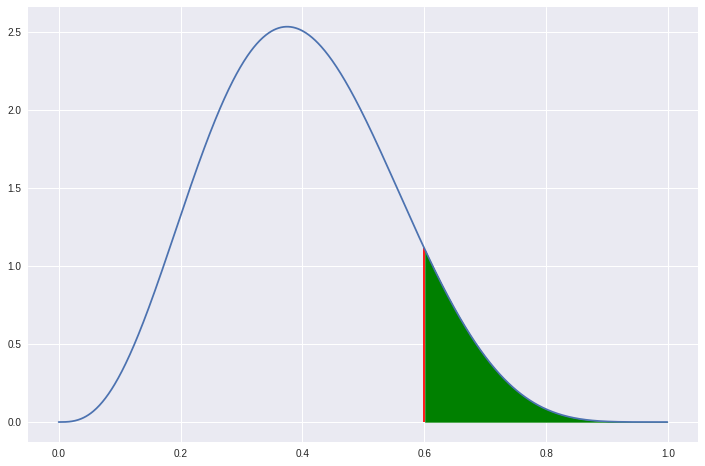

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

alpha = 4.0
beta_ = 6.0
p_limit = 0.6

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

x = np.arange (0, 1, 0.001)
y = beta(alpha, beta_)

plt.vlines(x=p_limit, ymin=0, ymax=y.pdf(p_limit), color='red')
plt.fill_between(x, y.pdf(x), where = x > p_limit, color='g')
plt.plot(x,y.pdf(x))

display('Hypothesis = event has a probability of 60% or more')
display('The probability of this hypothesis {:.1f}'.format(1 - y.cdf(p_limit)))

'Probability of interval 0.31'

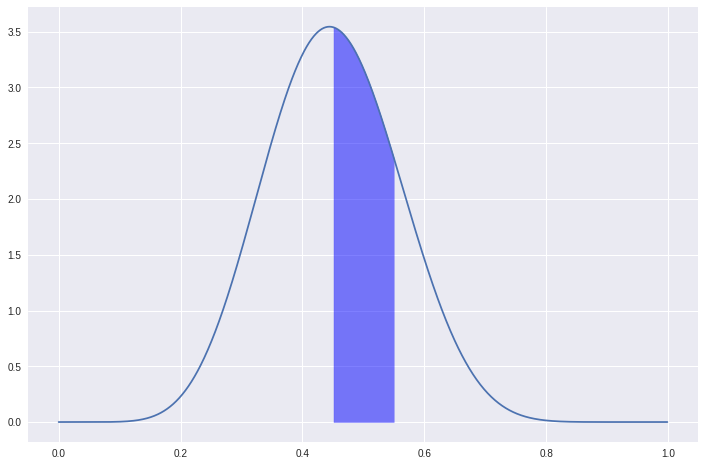

In [ ]:
alpha = 9.0
beta_ = 11.0

y = beta(alpha, beta_)

limit = 0.5
deviation = 0.05
plt.fill_between(x, y.pdf(x), where=(x > limit - deviation) & (x <= limit + deviation), color='b', alpha=0.5)
plt.plot(x,y.pdf(x))

display('Probability of interval {:.2}'.format(y.cdf(limit + deviation) - y.cdf(limit - deviation)))

(0.04255999999999998, 4.725109192804664e-16)


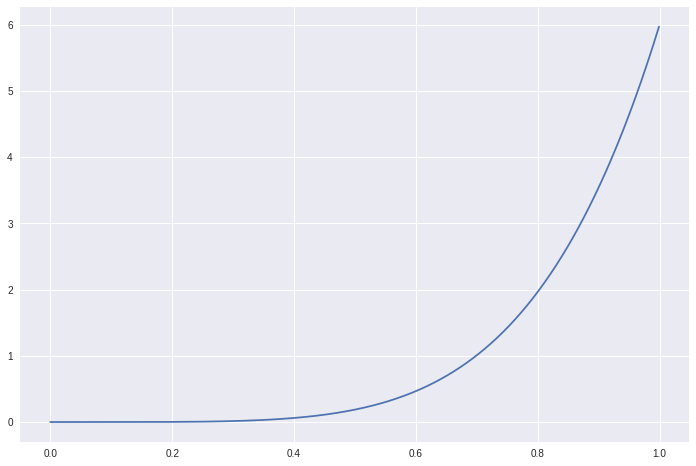

In [12]:
# 6 heads
# and then 1 tail
alpha = 6
beta_ = 1

x = np.arange (0, 1, 0.001)
y = beta(alpha, beta_)

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(x,y.pdf(x))

# True probability of getting heads between 0.4 and 0.6 is
from scipy import integrate
result = integrate.quad(lambda x: y.pdf(x), 0.4, 0.6)
print(result)
# 0.0425 of chance that coin is fair (probability of heads is between 0.4 and 0.6)

(0.9527469094270802, 1.4524663022109647e-11)


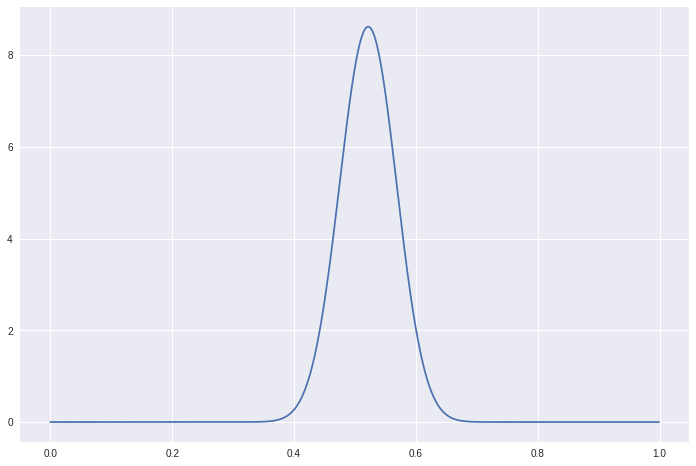

In [20]:
# Prior = coin is fair
# There should be at least 95% chance true rate being between 0.4 and 0.6
# The larger the alpha and beta values are, the stronger and reliable the prior belief is
prior_alpha = 55
prior_beta = 55
heads = 6
tails = 1

posterior = beta(prior_alpha + heads, prior_beta + tails)
plt.plot(x, posterior.pdf(x))

from scipy import integrate
result = integrate.quad(lambda x: posterior.pdf(x), 0.4, 0.6)
print(result) 

(0.49540589807539454, 5.246459098360555e-11)


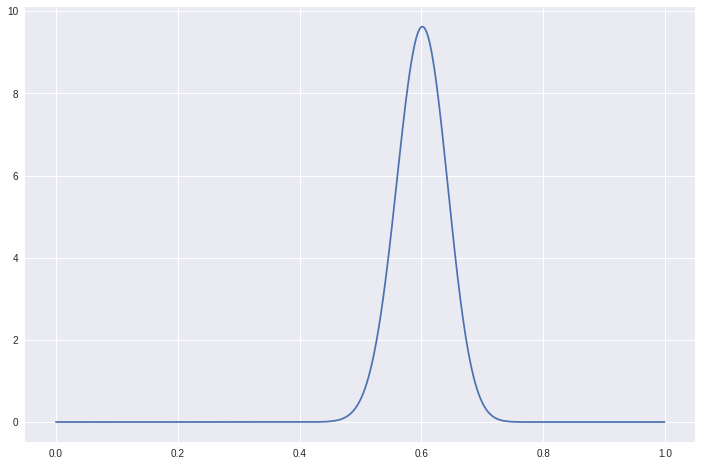

In [29]:
# How many heads more would make you believe that coin is not fair
# For example, when chance drops under 50%

heads = 29
tails = 1

posterior = beta(prior_alpha + heads, prior_beta + tails)
plt.plot(x, posterior.pdf(x))

from scipy import integrate
result = integrate.quad(lambda x: posterior.pdf(x), 0.4, 0.6)
print(result) # 29 heads = 0.495 chance of true rate of heads being between 0.4 and 0.6